# Predicting Avacado price using Linear regression 

## Table of Contents

- 1. [Introduction](#section1)</br>
    - 1.2 [Problem Statement](#section101)</br>
    - 1.1 [Data Description](#section102)<br/>
- 2. [Importing Data & Packages](#section2)</br>
- 3. [Exploratory Data Analysis](#section3)</br>
- 4. [Preprocessing the data](#section4)</br>
    - 4.1. [Drawing plots](#section401)</br>
    - 4.2 [Checking for corelation](#section402)</br>
    - 4.3 [Visualising Pairwise correlation](#section403)<br>
- 5. [Building the Model](#section5)</br>
    - 5.1 [Splitting the data to feture columns (X) and target column (y](#section501)</br>
    - 5.2 [Splitting X and y into training and test datasets.](#section502)</br>
    - 5.3 [Linear regression in scikit-learn](#section503)</br>
- 6. [Model Evaluation using __metrics.__](#section6)</br>

<a id=section1></a>
## 1. Introduction

<a id=section101><a>
### 1.1 Problem Statement

__Average Price__ for a particular a quantity avacado as __function__ of __region, year, types of avacado__. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given volume of avacado, region it is sold in, the year and the types of avacado, __predicts the average avacado price__.

- Which type of avacado __contribute__ to price?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section102><a>
### 1.2 Data Description

The Avacado dataset captures average price of avacado given certain volume of different kinds of Avacado is sold in different regions.

- Date - The date of the observation
- AveragePrice - the average price of a single avocado - target variable
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

<a id=section2></a>
## 2. Importing Data & Packages

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [122]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv', index_col=0)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


What are the **features**?
- Date: The date of selling avacado
- Total Volume: Total number of avacado's sold
- 4046 : Total avacados of type PSU_4046 sold
- 4225 : Total avacados of type PSU_4225 sold
- 4770 : Total avacados of type PSU_4770 sold
- Total Bags: Total number of bags
- Small Bags: Total number of small bags
- Large Bags: Total number of Large Bags
- XLarge Bags: Total nnumber of Xtra large Bags
- Type : Type of avacado - Conventional/ Organic
- year: year
- region: region

What is the **response**?
- AveragePrice: Average price of an avacado.

<a id=section3></a>
## 3. Exploratory Data Analysis

In [3]:
data.shape

(18249, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [6]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There are 18249 **observations**.

Since __Total Volume__ & __Total Bags__ are just the total of __4046, 4225, 4770__ & __Small/Large/XLarge Bags__ will calculate the percentage of these columns and drop the individual columns

In [123]:
data["4046_perc"] = data["4046"]/data["Total Volume"] * 100
data["4225_perc"] = data["4225"]/data["Total Volume"] * 100
data["4770_perc"] = data["4770"]/data["Total Volume"] * 100
data["Small_Bags_perc"] = data["Small Bags"]/data["Total Bags"] * 100
data["Large_Bags_perc"] = data["Large Bags"]/data["Total Bags"] * 100
data["XLarge_Bags_perc"] = data["XLarge Bags"]/data["Total Bags"] * 100
data = data.drop(data[["4046", "4225", "4770","Small Bags","Large Bags","XLarge Bags"]],  axis=1)
data.head()

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,XLarge_Bags_perc
0,2015-12-27,1.33,64236.62,8696.87,conventional,2015,Albany,1.613939,84.772284,0.074973,98.927775,1.072225,0.0
1,2015-12-20,1.35,54876.98,9505.56,conventional,2015,Albany,1.228712,81.343416,0.106292,98.974390,1.025610,0.0
2,2015-12-13,0.93,118220.22,8145.35,conventional,2015,Albany,0.672220,92.327412,0.110387,98.733756,1.266244,0.0
3,2015-12-06,1.08,78992.15,5811.16,conventional,2015,Albany,1.433054,91.118434,0.091883,97.698222,2.301778,0.0
4,2015-11-29,1.28,51039.60,6183.95,conventional,2015,Albany,1.844607,85.890936,0.148473,96.803176,3.196824,0.0


In [8]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

<a id=section4></a>
### 4. Preprocessing the data

###### Changing the date value from text to 'Date' type:

In [124]:
import datetime as dt
print(data.head())
data['Date'] = pd.to_datetime(data['Date'])
data['Date']=data['Date'].map(dt.datetime.toordinal)
data.head()

         Date  AveragePrice  Total Volume  Total Bags          type  year  \
0  2015-12-27          1.33      64236.62     8696.87  conventional  2015   
1  2015-12-20          1.35      54876.98     9505.56  conventional  2015   
2  2015-12-13          0.93     118220.22     8145.35  conventional  2015   
3  2015-12-06          1.08      78992.15     5811.16  conventional  2015   
4  2015-11-29          1.28      51039.60     6183.95  conventional  2015   

   region  4046_perc  4225_perc  4770_perc  Small_Bags_perc  Large_Bags_perc  \
0  Albany   1.613939  84.772284   0.074973        98.927775         1.072225   
1  Albany   1.228712  81.343416   0.106292        98.974390         1.025610   
2  Albany   0.672220  92.327412   0.110387        98.733756         1.266244   
3  Albany   1.433054  91.118434   0.091883        97.698222         2.301778   
4  Albany   1.844607  85.890936   0.148473        96.803176         3.196824   

   XLarge_Bags_perc  
0               0.0  
1           

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,XLarge_Bags_perc
0,735959,1.33,64236.62,8696.87,conventional,2015,Albany,1.613939,84.772284,0.074973,98.927775,1.072225,0.0
1,735952,1.35,54876.98,9505.56,conventional,2015,Albany,1.228712,81.343416,0.106292,98.974390,1.025610,0.0
2,735945,0.93,118220.22,8145.35,conventional,2015,Albany,0.672220,92.327412,0.110387,98.733756,1.266244,0.0
3,735938,1.08,78992.15,5811.16,conventional,2015,Albany,1.433054,91.118434,0.091883,97.698222,2.301778,0.0
4,735931,1.28,51039.60,6183.95,conventional,2015,Albany,1.844607,85.890936,0.148473,96.803176,3.196824,0.0


###### Encoding colums region and type columns. 

In [125]:
data = pd.get_dummies(data, columns=["region","type"], drop_first=True)
data.head()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,735959,1.33,64236.62,8696.87,2015,1.613939,84.772284,0.074973,98.927775,1.072225,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,54876.98,9505.56,2015,1.228712,81.343416,0.106292,98.974390,1.025610,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,118220.22,8145.35,2015,0.672220,92.327412,0.110387,98.733756,1.266244,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,78992.15,5811.16,2015,1.433054,91.118434,0.091883,97.698222,2.301778,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,51039.60,6183.95,2015,1.844607,85.890936,0.148473,96.803176,3.196824,...,0,0,0,0,0,0,0,0,0,0


In [127]:
data.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,...,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,736189.979670,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,...,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018357,0.499918
std,341.513465,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,...,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134243,0.500014
min,735602.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,735896.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,736190.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,736484.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,736778.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Checking the skewness of data

In [126]:
print('The skewness of Data is \n',data.skew())


The skewness of Total Volume is 9.00768747885452
The skewness of 4046 is 0.8160087715098218
The skewness of 4225 is 0.4465939041898823
The skewness of 4770 is 3.78369364741243
The skewness of Small Bags is -1.1060623220161228
The skewness of Large Bags is 1.1477631664191004
The skewness of XLarge Bags is 7.437007164177549
The skewness of Data is 
 Date                       0.000117
AveragePrice               0.580303
Total Volume               9.007687
Total Bags                 9.756072
year                       0.215339
                             ...   
region_Tampa               7.142715
region_TotalUS             7.142715
region_West                7.142715
region_WestTexNewMexico    7.176475
type_organic               0.000329
Length: 65, dtype: float64


There are some outliers at the top. So removing .15% from the quartile Q4.

In [128]:
 Q1 = data.quantile(0.00)
 Q3 = data.quantile(0.985)
 Q_diff = Q3 - Q1
 data_without_outlier = data[~((data < (Q1 - Q_diff)) | (data > (Q3 + Q_diff ))).any(axis=1)]
 data_without_outlier.shape

(18014, 65)

<a id=section401></a>
### 4.1 Drawing plots

Drawing plots to. check the distribution of data.

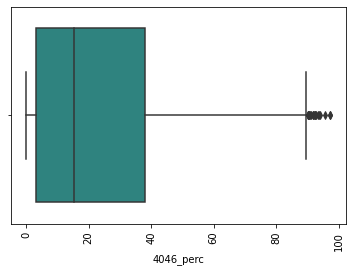

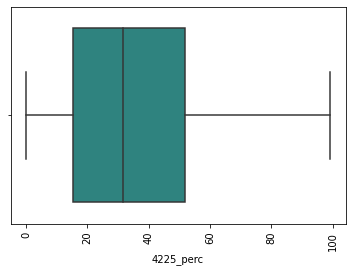

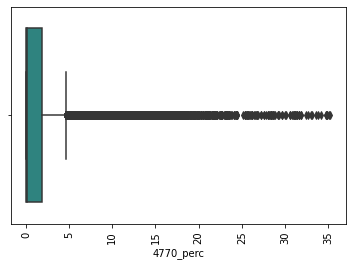

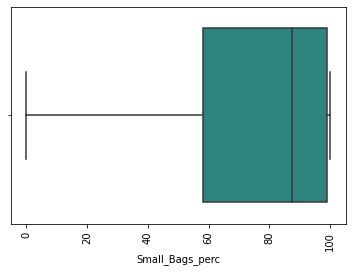

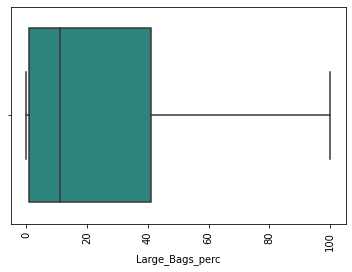

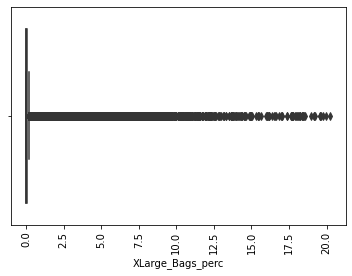

In [156]:
import matplotlib.pyplot as plt

for column in ["4046_perc","4225_perc","4770_perc","Small_Bags_perc","Large_Bags_perc", "XLarge_Bags_perc"]:
    plt.figure()
    sns.boxplot(data_without_outlier[column], palette='viridis', width=0.8)
    plt.xticks(rotation=90)

XLarge_Bags_perc & 4770_perc data is skewed

In [15]:
data_without_outlier.describe()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
count,18014.000000,18014.000000,1.801400e+04,1.801400e+04,18014.000000,18014.000000,18014.000000,18014.000000,17999.000000,17999.000000,...,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000
mean,736189.927723,1.409550,5.442465e+05,1.563342e+05,2016.147607,22.413067,34.742968,1.837246,75.012914,24.333269,...,0.018763,0.018763,0.018763,0.018763,0.018763,0.018763,0.009382,0.018763,0.018486,0.506217
std,341.419805,0.403169,1.221710e+06,3.660827e+05,0.939357,21.457989,23.624497,3.925983,28.661367,28.703319,...,0.135691,0.135691,0.135691,0.135691,0.135691,0.135691,0.096406,0.135691,0.134703,0.499975
min,735602.000000,0.440000,8.456000e+01,0.000000e+00,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,735896.000000,1.100000,1.065966e+04,4.959685e+03,2015.000000,3.238851,15.503492,0.000000,58.046691,0.897160,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,736190.000000,1.380000,1.030348e+05,3.851821e+04,2016.000000,15.449088,31.530021,0.141105,87.567614,11.361351,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,736484.000000,1.670000,4.167509e+05,1.077150e+05,2017.000000,37.941305,52.026685,1.847884,98.788879,41.031205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,736778.000000,3.250000,1.127475e+07,4.145407e+06,2018.000000,97.252342,99.262785,35.239559,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
data.shape

(18249, 65)

In [131]:
data_without_outlier.shape

(18014, 65)

In [133]:
data_without_outlier.head()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,735959,1.33,64236.62,8696.87,2015,1.613939,84.772284,0.074973,98.927775,1.072225,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,54876.98,9505.56,2015,1.228712,81.343416,0.106292,98.974390,1.025610,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,118220.22,8145.35,2015,0.672220,92.327412,0.110387,98.733756,1.266244,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,78992.15,5811.16,2015,1.433054,91.118434,0.091883,97.698222,2.301778,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,51039.60,6183.95,2015,1.844607,85.890936,0.148473,96.803176,3.196824,...,0,0,0,0,0,0,0,0,0,0


<a id=section402></a>
### 4.2 Checking for corelation

###### Checking for corelation between columns

In [134]:
data_without_outlier.corr()

,Date,AveragePrice,Total Volume,Total Bags,year,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
Date,1.000000,0.143701,0.018518,0.116434,0.950244,-0.168006,-0.210891,-0.184334,-0.040288,0.035087,...,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000021,0.000029,-0.000055,0.000610
AveragePrice,0.143701,1.000000,-0.342540,-0.302081,0.091298,-0.338980,0.156434,-0.125056,0.117212,-0.106426,...,-0.105749,-0.003956,0.012362,0.007227,0.037996,-0.000242,0.032945,-0.047104,-0.049671,0.614069
Total Volume,0.018518,-0.342540,1.000000,0.922445,0.032811,0.236200,0.002261,0.089058,0.047179,-0.056466,...,0.277057,0.144429,-0.056391,-0.050863,-0.057939,-0.039500,0.033721,0.302341,-0.012668,-0.411430
Total Bags,0.116434,-0.302081,0.922445,1.000000,0.128458,0.170620,-0.044678,0.052847,0.014291,-0.022590,...,0.201783,0.143819,-0.052065,-0.042586,-0.054369,-0.037265,0.092787,0.351183,-0.019048,-0.363732
year,0.950244,0.091298,0.032811,0.128458,1.000000,-0.156196,-0.208140,-0.176773,-0.042876,0.037963,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000033,0.000047,-0.000067,0.000705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
region_Tampa,0.000029,-0.000242,-0.039500,-0.037265,0.000047,0.096576,-0.146352,-0.063723,-0.012928,0.012573,...,-0.019122,-0.019122,-0.019122,-0.019122,-0.019122,1.000000,-0.013457,-0.019122,-0.018977,-0.001720
region_TotalUS,0.000021,0.032945,0.033721,0.092787,0.000033,-0.024421,-0.004356,-0.029726,-0.022199,0.024375,...,-0.013457,-0.013457,-0.013457,-0.013457,-0.013457,-0.013457,1.000000,-0.013457,-0.013355,0.096114
region_West,0.000029,-0.047104,0.302341,0.351183,0.000047,0.047143,-0.032829,-0.028476,-0.118967,0.121403,...,-0.019122,-0.019122,-0.019122,-0.019122,-0.019122,-0.019122,-0.013457,1.000000,-0.018977,-0.001720
region_WestTexNewMexico,-0.000055,-0.049671,-0.012668,-0.019048,-0.000067,0.107266,-0.064494,-0.014885,-0.002997,0.004116,...,-0.018977,-0.018977,-0.018977,-0.018977,-0.018977,-0.018977,-0.013355,-0.018977,1.000000,-0.002943


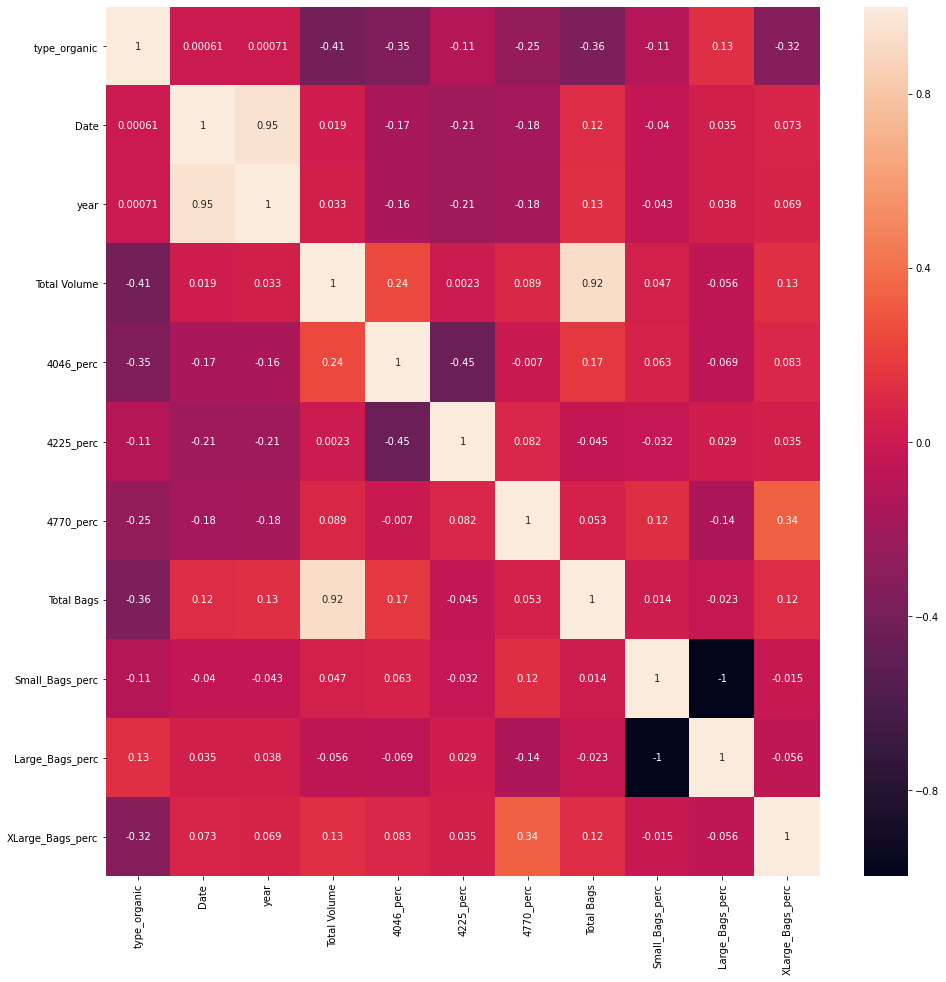

In [136]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap( data_without_outlier[["type_organic","Date","year","Total Volume","4046_perc","4225_perc","4770_perc","Total Bags","Small_Bags_perc","Large_Bags_perc","XLarge_Bags_perc"]].corr(), annot=True );

There is a strong co-relation between ( __Total Volume__ & __Total Bags__), (__year__ & __Date__),  (__Large_Bags_perc__ & __Small_Bags_perc__). Also, data in total bags and total volume are redundant data. Data in Date and year is redundant. So dropping the columns, __Total Volume__ , __Total Bags__ and __year__<br>

In [137]:
data_without_outlier = data_without_outlier.drop(data_without_outlier[["Total Volume", "Total Bags", "year"]],  axis=1)

In [138]:
data_without_outlier.head()

,Date,AveragePrice,4046_perc,4225_perc,4770_perc,Small_Bags_perc,Large_Bags_perc,XLarge_Bags_perc,region_Atlanta,region_BaltimoreWashington,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,735959,1.33,1.613939,84.772284,0.074973,98.927775,1.072225,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,735952,1.35,1.228712,81.343416,0.106292,98.974390,1.025610,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,735945,0.93,0.672220,92.327412,0.110387,98.733756,1.266244,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,735938,1.08,1.433054,91.118434,0.091883,97.698222,2.301778,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,735931,1.28,1.844607,85.890936,0.148473,96.803176,3.196824,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
data_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 11
Data columns (total 62 columns):
Date                          18014 non-null int64
AveragePrice                  18014 non-null float64
4046_perc                     18014 non-null float64
4225_perc                     18014 non-null float64
4770_perc                     18014 non-null float64
Small_Bags_perc               17999 non-null float64
Large_Bags_perc               17999 non-null float64
XLarge_Bags_perc              17999 non-null float64
region_Atlanta                18014 non-null uint8
region_BaltimoreWashington    18014 non-null uint8
region_Boise                  18014 non-null uint8
region_Boston                 18014 non-null uint8
region_BuffaloRochester       18014 non-null uint8
region_California             18014 non-null uint8
region_Charlotte              18014 non-null uint8
region_Chicago                18014 non-null uint8
region_CincinnatiDayton       18014 non-null uint8
region_Columb

There are some missing values in Small/Large and XLarge bags after the data processing. replacing the null values with median values.

In [141]:
data_without_outlier.Small_Bags_perc.fillna(data_without_outlier.Small_Bags_perc.median(), inplace=True)
data_without_outlier.Large_Bags_perc.fillna(data_without_outlier.Large_Bags_perc.median(), inplace=True)
data_without_outlier.XLarge_Bags_perc.fillna(data_without_outlier.XLarge_Bags_perc.median(), inplace=True)
data_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 11
Data columns (total 62 columns):
Date                          18014 non-null int64
AveragePrice                  18014 non-null float64
4046_perc                     18014 non-null float64
4225_perc                     18014 non-null float64
4770_perc                     18014 non-null float64
Small_Bags_perc               18014 non-null float64
Large_Bags_perc               18014 non-null float64
XLarge_Bags_perc              18014 non-null float64
region_Atlanta                18014 non-null uint8
region_BaltimoreWashington    18014 non-null uint8
region_Boise                  18014 non-null uint8
region_Boston                 18014 non-null uint8
region_BuffaloRochester       18014 non-null uint8
region_California             18014 non-null uint8
region_Charlotte              18014 non-null uint8
region_Chicago                18014 non-null uint8
region_CincinnatiDayton       18014 non-null uint8
region_Columb

###### Data distribution of AveragePrice, Date, type_organic and the different size bags and varieties :

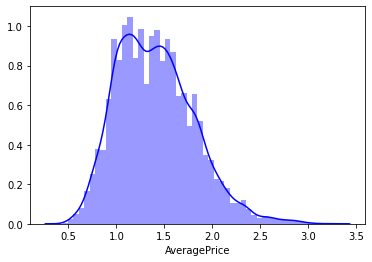

In [77]:
sns.distplot(data.AveragePrice, color="b")

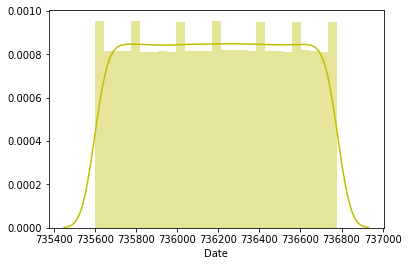

In [82]:
sns.distplot(data_without_outlier.Date, color="y")

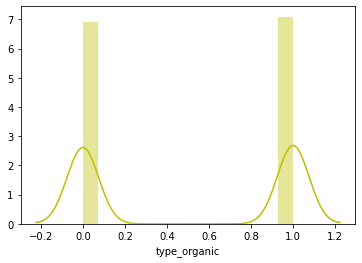

In [53]:
sns.distplot(data_without_outlier.type_organic, color="y")

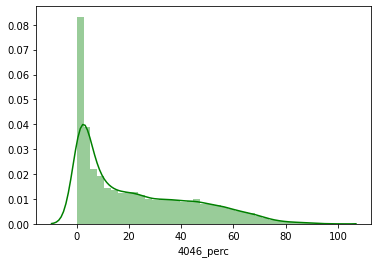

In [78]:
sns.distplot(data_without_outlier["4046_perc"], color="g")

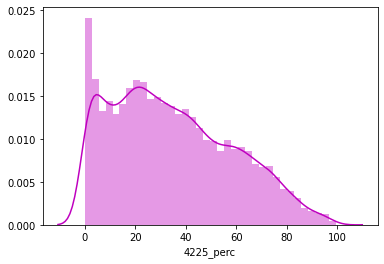

In [79]:
sns.distplot(data_without_outlier["4225_perc"], color="m")

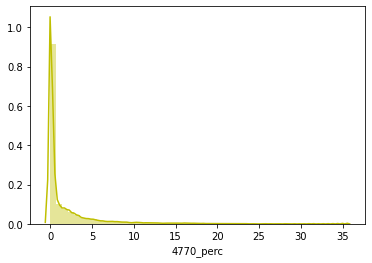

In [56]:
sns.distplot(data_without_outlier["4770_perc"], color="y")

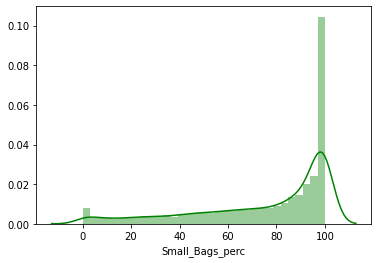

In [57]:
sns.distplot(data_without_outlier["Small_Bags_perc"], color="g")

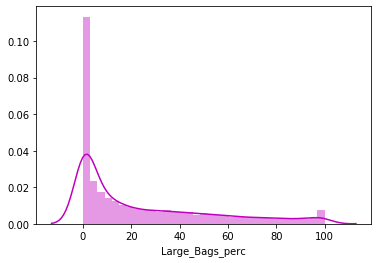

In [244]:
sns.distplot(data_without_outlier["Large_Bags_perc"], color="m")

In [247]:
data_without_outlier.XLarge_Bags_perc.fillna(data_without_outlier.XLarge_Bags_perc.median(), inplace=True)

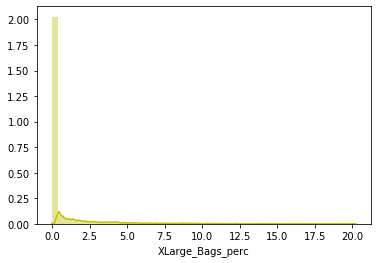

In [248]:
sns.distplot(data_without_outlier["XLarge_Bags_perc"], color="y")

<a id=section403></a>
### 4.3 Visualising Pairwise correlation

#### Is there a relationship between Average price and other columns?

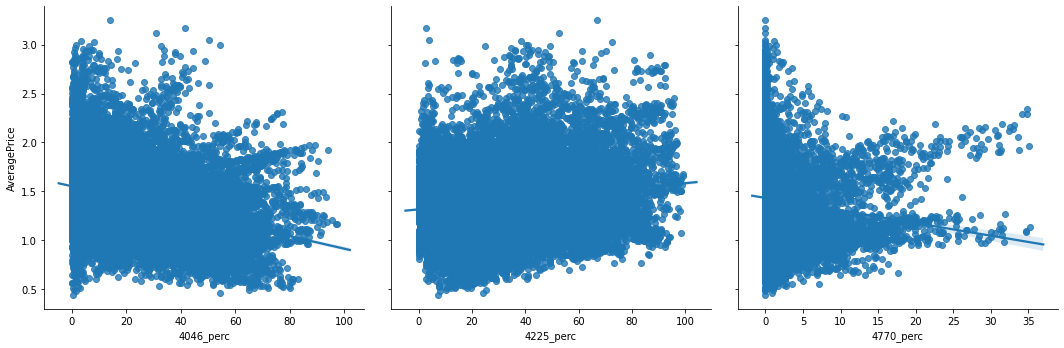

In [144]:
sns.pairplot(data_without_outlier, x_vars=["4046_perc","4225_perc","4770_perc"], y_vars='AveragePrice', height=5, aspect=1, kind='reg')

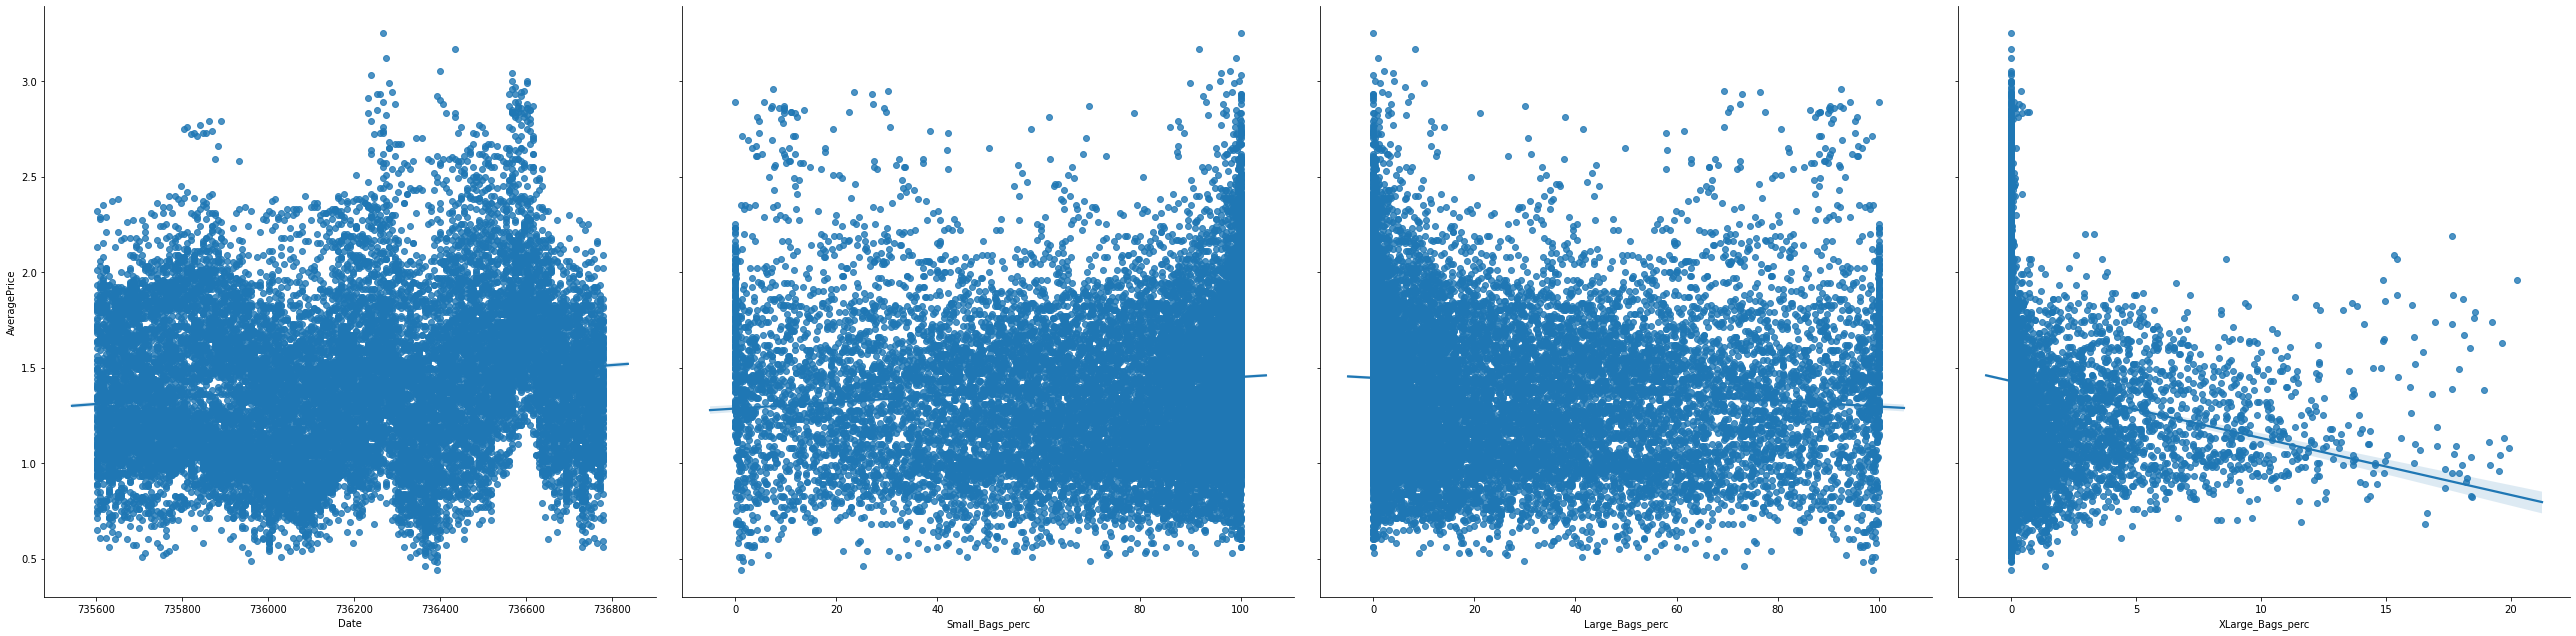

In [145]:
sns.pairplot(data_without_outlier, x_vars=["Date","Small_Bags_perc","Large_Bags_perc","XLarge_Bags_perc"], y_vars='AveragePrice', height=9, aspect=1, kind='reg')

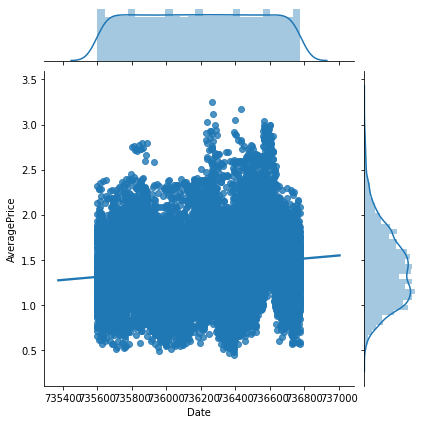

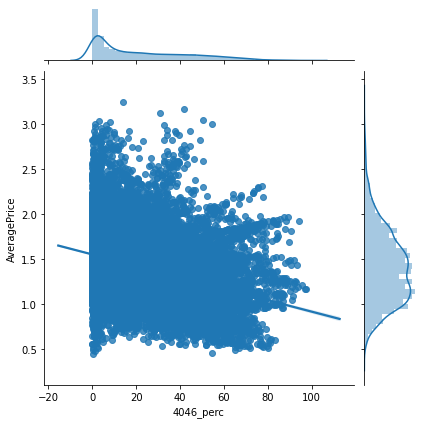

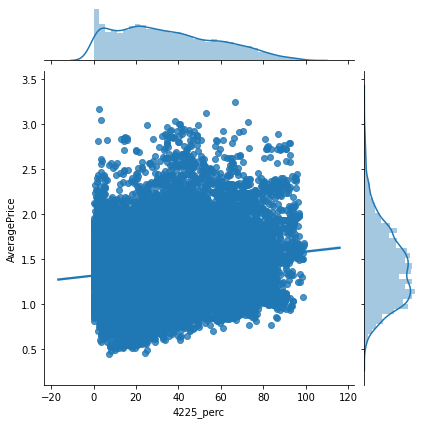

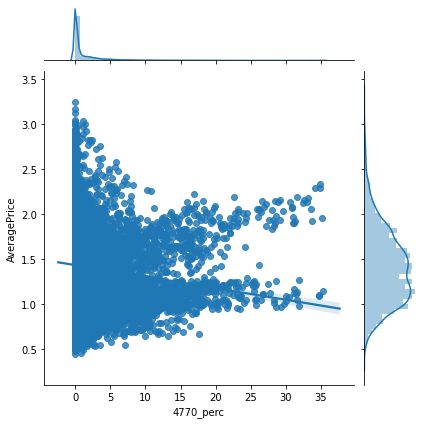

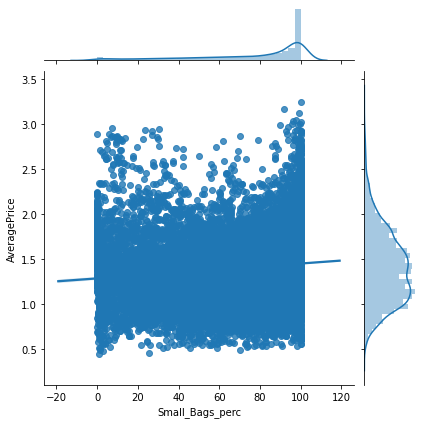

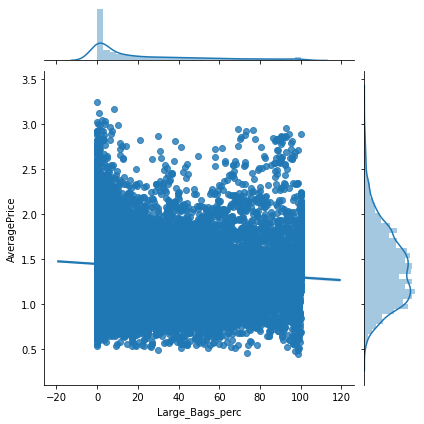

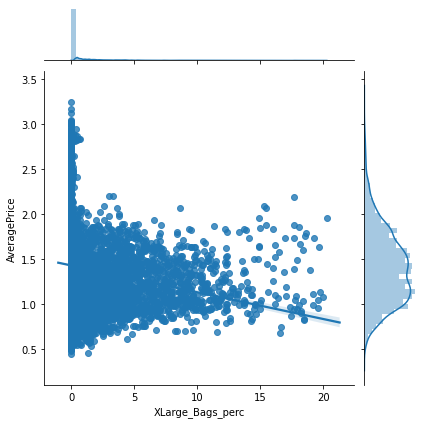

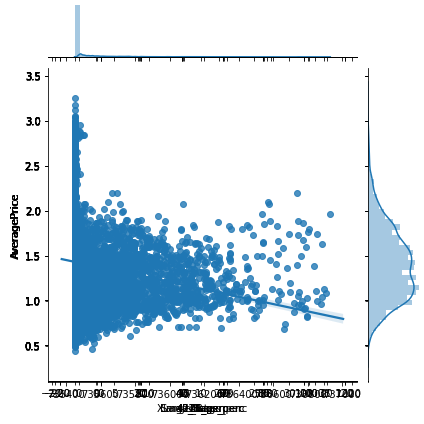

In [146]:

JG2 = sns.jointplot("Date", "AveragePrice", data=data_without_outlier, kind='reg')
JG3 = sns.jointplot("4046_perc", "AveragePrice", data=data_without_outlier, kind='reg')
JG4 = sns.jointplot("4225_perc", "AveragePrice", data=data_without_outlier, kind='reg')
JG5 = sns.jointplot("4770_perc", "AveragePrice", data=data_without_outlier, kind='reg')
JG7 = sns.jointplot("Small_Bags_perc", "AveragePrice", data=data_without_outlier, kind='reg')
JG8 = sns.jointplot("Large_Bags_perc", "AveragePrice", data=data_without_outlier, kind='reg')
JG9 = sns.jointplot("XLarge_Bags_perc", "AveragePrice", data=data_without_outlier, kind='reg')


#subplots migration
f = plt.figure()
for J in [ JG2,JG3,JG4,JG5, JG7,JG8,JG9]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

Observation
Average Price and 

<a id=section5></a>
## 5 Building the Model

<a id=section501></a>
### 5.1 Splitting the data to feture columns (X) and target column (y)

In [166]:
X = data_without_outlier.drop(["AveragePrice"], axis=1)
X.shape

(18014, 61)

In [167]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(18014, 61)


In [168]:
y = data_without_outlier["AveragePrice"]
y.shape

(18014,)

In [169]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(18014,)


<a id=section502></a>
### 5.2 Splitting X and y into training and test datasets.

In [170]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [171]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14411, 61)
y_train shape:  (14411,)

Test cases as below
X_test shape:  (3603, 61)
y_test shape:  (3603,)


<a id=section503></a>
### 5.3 Linear regression in scikit-learn

In [172]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train) 
y_test_pred = linreg.predict(X_test)
# linreg = linreg(X,y)



<a id=section6></a>
## 6 Model Evaluation using __metrics.__

In [175]:
from sklearn.metrics import r2_score

R2_train = r2_score(y_train_pred, y_train) 
print('R2 for training set is {}'.format(R2_train))
R2_test = r2_score(y_test, y_test_pred)
print('R2 for testing set is {}'.format(R2_test))

R2 for training set is 0.414668560087753
R2 for testing set is 0.6289825651503589


In [176]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 0.24355916047750886
RMSE for testing set is 0.25115100487949105


###### Checking the power of each column

In [94]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

data_without_outlier
X = X1
y = y

X2 = sm.add_constant(X1)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     581.9
Date:                Tue, 17 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:16:06   Log-Likelihood:                -7600.3
No. Observations:               18014   AIC:                         1.521e+04
Df Residuals:                   18007   BIC:                         1.527e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               44.0014      8.917  

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
